<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. []의 문자에서 활용( [index], [:slicing]), 함수를 활용{for : 반복, if :판단, enumerate() :순번 integer 출력}
1. 재무제표 Web Crawling ==> type 변경 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. pd.to_datetime()
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df.column이름 &nbsp; | &nbsp; df['column이름']
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()
1. df.apply(lambda x: x ** 2)  
1. pd.pivot_table(df,index = [], values = [], aggfunc = [], margins = True)

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

<br><br>
## <strong>1 금융 시계열 데이터
1. 금융 데이터 수집하기
1. 테이블 결측치 처리하기
1. 정규화 처리하기

<br>
### **01 시계열 데이터 수집하기**
! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade
1. https://github.com/pydata/pandas-datareader


In [12]:
# %matplotlib inline

# from pandas_datareader import get_data_yahoo

# samsung = get_data_yahoo('005930.KS', '2017-01', '2018-01')
# samsung.Close.plot()

In [13]:
# samsung.head()

In [14]:
# samsung['2017-07'].head()

In [1]:
# from pandas_datareader import get_data_yahoo

# start_date = '2013-01-01' 
# #startdate를 1996년으로 설정해두면 가장 오래된 데이터부터 전부 가져올 수 있다.

# codes = ['GM', 'KO', '005930.KS', '031510.KQ']

# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)
# prices.head(3)

In [2]:
# prices.to_csv('./data/stock_data.csv', encoding='ms949')
# print('done')

In [15]:
# 이 부분은 약 1분의 시간으로 고민을 한 뒤에 따라하도록 한다
import pandas as pd
import numpy as np
prices = pd.read_csv('./data/stock_data.csv', encoding='ms949')
prices = prices.set_index('Date')
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2013-01-02 to 2018-06-05
Data columns (total 4 columns):
000660.KS    1406 non-null float64
005930.KS    1406 non-null float64
GM           1406 non-null float64
KO           1406 non-null float64
dtypes: float64(4)
memory usage: 54.9 KB


<br>
### **02 pandas를 활용한 데이터 정렬 및 보간법**
1. DataFrame.fillna()
2. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

In [16]:
# 빠진 내용이 너무 많음에도 비교 데이터로 보간을 필요시
# 고육지책
print(prices.isnull().sum())
# Series.interpolate()

000660.KS    0
005930.KS    0
GM           0
KO           0
dtype: int64


In [17]:
prices = prices.fillna(method='ffill')     # 중간에 Nan이 존재시, 직전의 가격을 덧붙인다
prices = prices.dropna()                   # 이후에도 빈 부분이 있으면(맨앞/ 맨뒤) 전체적 연산을 위해 제거한다
prices.tail(3)

,000660.KS,005930.KS,GM,KO
Date,,,,
2018-06-01,91400.0,51300.0,43.200001,43.119999
2018-06-04,89800.0,51100.0,43.779999,43.490002
2018-06-05,90800.0,50500.0,43.779999,43.490002


<br><br>
## **2 금융 시계열 데이터 전처리**
데이터 분석을 위한 전처리 방법

<br>
### **01 가격 차이가 큰 시계열 데이터 비교하기**
데이터 정규화 / 비정규화

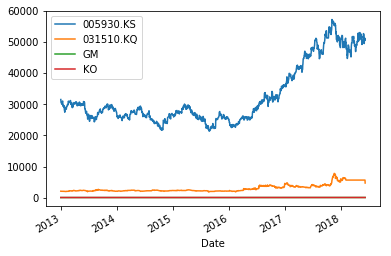

In [8]:
%matplotlib inline
prices.plot()

In [9]:
price = prices['005930.KS']
price[-5:]

Date
2018-05-30    49500.0
2018-05-31    50700.0
2018-06-01    51300.0
2018-06-04    51100.0
2018-06-05    50600.0
Name: 005930.KS, dtype: float64

In [10]:
price.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-04', '2018-06-05'],
              dtype='datetime64[ns]', name='Date', length=1406, freq=None)

In [11]:
price.index = pd.DatetimeIndex(price.index)
price.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-04', '2018-06-05'],
              dtype='datetime64[ns]', name='Date', length=1406, freq=None)

In [12]:
# 주가변화율 계산 (2013-08-03 ~ 2013-10-03)
# 1 : 단위 투자비용 (ex) 주가 매입비용 )

price["2013-10-03"] / price["2013-08-01"] -1

0.10781250000000009

In [13]:
# .pct_change() : 퍼센트 변화율을 계산
# .cumprod()    : 일별 퍼센트 변화의 "누적 곱" 계산 (Cumulative Product)
returns      = price.pct_change()
# returns

In [14]:
returns[:5]

Date
2013-01-02         NaN
2013-01-03   -0.020939
2013-01-04   -0.011666
2013-01-07   -0.003279
2013-01-08   -0.013158
Name: 005930.KS, dtype: float64

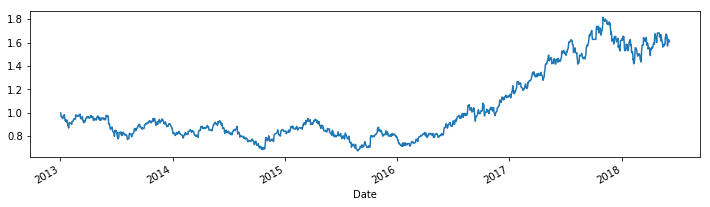

In [15]:
ret_price    = (1 + returns).cumprod() # 1 + : 초기 1에서 부터 확률곱을 누적 (복리공식)
ret_price[0] = 1

%matplotlib inline
ret_price.plot(figsize=(12,3))

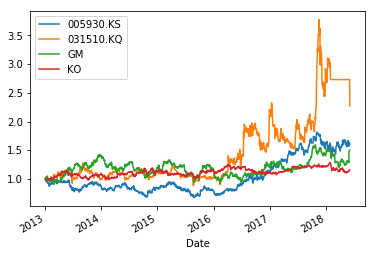

In [16]:
for col in prices.columns:
    pct_returns = prices[col].pct_change()
    pct_returns = (1 + pct_returns).cumprod() # 1 + : 초기 1에서 부터 확률곱을 누적
    pct_returns[0] = 1
    pct_returns.plot(legend=True)

<br>
### **02 누적 수익률 계산 **
.pct_change().cumprod()

In [17]:
# 특정기간의 누적 수익을 계산한다
# 일간 데이터 -> 월갈 데이터로 줄인뒤 가격 변동률을 추출한다
# 2012년도 1년 데이터만 추출
month_returns = price.resample('MS').last().pct_change()
month_returns['2016']

Date
2016-01-01   -0.087302
2016-02-01    0.024348
2016-03-01    0.113752
2016-04-01   -0.051067
2016-05-01    0.037751
2016-06-01    0.102941
2016-07-01    0.080000
2016-08-01    0.052632
2016-09-01   -0.013580
2016-10-01    0.025657
2016-11-01    0.065284
2016-12-01    0.032073
Freq: MS, Name: 005930.KS, dtype: float64

In [18]:
# 특정기간의 뭘별 백분율 누적곱 변화를 계산한다
# 월초에 원금을 투입한 경우, 원금의 변화율
m_ret = (1 + month_returns).cumprod()
m_ret['2016']

Date
2016-01-01    0.794199
2016-02-01    0.813536
2016-03-01    0.906077
2016-04-01    0.859807
2016-05-01    0.892265
2016-06-01    0.984116
2016-07-01    1.062845
2016-08-01    1.118785
2016-09-01    1.103591
2016-10-01    1.131906
2016-11-01    1.205801
2016-12-01    1.244475
Freq: MS, Name: 005930.KS, dtype: float64

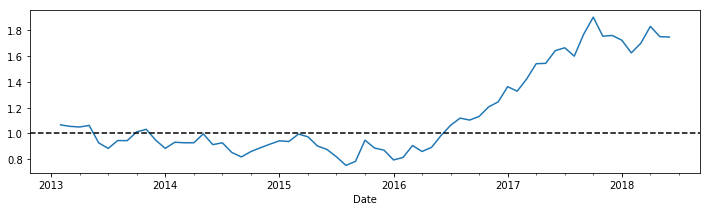

In [19]:
import matplotlib.pyplot as plt
m_ret.plot(figsize=(12,3))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
### **03 중간 배당데이터 추가하기**
재귀적 연산

In [20]:
month_returns[:10]

Date
2013-01-01         NaN
2013-02-01    0.066298
2013-03-01   -0.011010
2013-04-01   -0.004584
2013-05-01    0.011842
2013-06-01   -0.127438
2013-07-01   -0.046200
2013-08-01    0.068750
2013-09-01   -0.000731
2013-10-01    0.071690
Freq: MS, Name: 005930.KS, dtype: float64

In [21]:
# 배당일에 배당 비율을 추가하는 경우
month_returns['2013-03-01'] += 0.003

In [22]:
# cf) 재귀적 연산 +=, -= : 자기 자신을 연산한 결과값을 자신에게 저장
# (무슨 말이 이리도 꼬였니..)
for i in range(4):
    i += 10000     # i = i + 10000
    print(i)

10000
10001
10002
10003


<br><br>
## **3 금융데이터  분석**
pandas를 활용한 금융데이터 분석

<br>
### **01 Introduction**

In [23]:
prices.head(3)

,005930.KS,031510.KQ,GM,KO
Date,,,,
2013-01-02,31520.0,2065.0,29.129999,37.599998
2013-01-03,30860.0,2050.0,29.820000,37.599998
2013-01-04,30500.0,2050.0,29.860001,37.660000


In [24]:
prices.describe()

,005930.KS,031510.KQ,GM,KO
count,1406.000000,1406.000000,1406.000000,1406.000000
mean,32589.082504,2994.182077,34.672653,42.095818
std,9575.569318,1205.789197,3.852245,2.409234
min,21340.000000,1820.000000,26.330000,36.840000
25%,25840.000000,2175.000000,31.750000,40.495001
50%,28540.000000,2335.000000,34.680000,41.990002
75%,38050.000000,3600.000000,36.830002,43.779999
max,57220.000000,7800.000000,46.480000,48.529999


In [25]:
prices.describe().loc[ ['mean', 'std'] ,:]

,005930.KS,031510.KQ,GM,KO
mean,32589.082504,2994.182077,34.672653,42.095818
std,9575.569318,1205.789197,3.852245,2.409234


In [26]:
price.agg(['mean'])

mean    32589.082504
Name: 005930.KS, dtype: float64

In [27]:
# index 중 일부분만 출력
prices.agg(['mean', 'std'])

,005930.KS,031510.KQ,GM,KO
mean,32589.082504,2994.182077,34.672653,42.095818
std,9575.569318,1205.789197,3.852245,2.409234


<br>
### **02 주가간의 상관계수 분석**
.corr

In [20]:
prices_corr = prices.pct_change().corr(method="spearman")  # 스피어만 상관계수
prices_corr = prices.pct_change().corr(method="kendall")   # 켄달타우 상관계수
prices_corr

,000660.KS,005930.KS,GM,KO
000660.KS,1.000000,0.227932,0.070426,0.028670
005930.KS,0.227932,1.000000,0.053770,0.022919
GM,0.070426,0.053770,1.000000,0.185511
KO,0.028670,0.022919,0.185511,1.000000


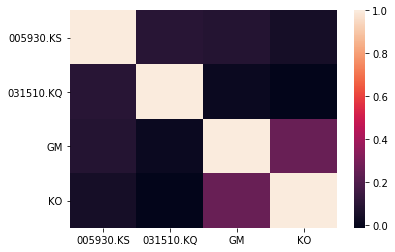

In [30]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)